In [76]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from cv2 import imshowf

tf.random.set_seed(3)

from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

## Loading MNIST dataset


In [77]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [78]:
type(X_train)

numpy.ndarray

In [79]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


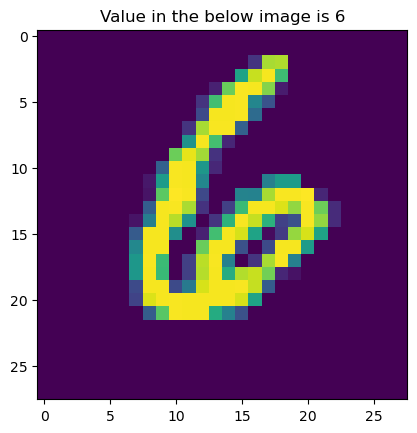

In [80]:
index = 13
plt.title(f"Value in the below image is {Y_train[index]}")
plt.imshow(X_train[index])
plt.show()

In [81]:
print(np.unique(Y_train), np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]


In [82]:
X_train = X_train/255
X_test = X_test/255

In [123]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=28, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(units=56, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [124]:
model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [125]:
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3291 - accuracy: 0.9053
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1564 - accuracy: 0.9542
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1222 - accuracy: 0.9631
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1044 - accuracy: 0.9690
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0908 - accuracy: 0.9729
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0806 - accuracy: 0.9748
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0731 - accuracy: 0.9777
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0670 - accuracy: 0.9791
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0611 - accuracy: 0.9810
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.056

In [126]:
losse, accuracy = model.evaluate(x_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1189 - accuracy: 0.9670


In [103]:
print(losse, accuracy)

0.11113487184047699 0.9696000218391418


In [106]:
y_predict_test = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


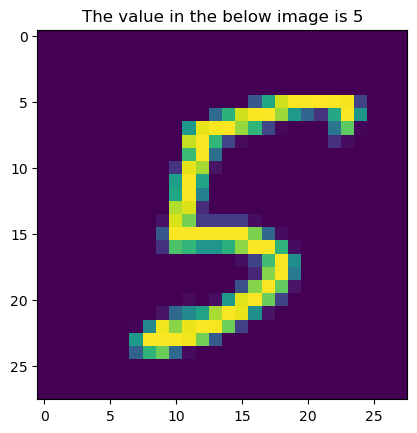

In [110]:
i = 23
label_y_pred = np.argmax(y_predict_test[i])
plt.imshow(X_test[i])
plt.title(f"The value in the below image is {label_y_pred}")
plt.show()

In [111]:
y_pred_label = [np.argmax(i) for i in y_predict_test]

In [112]:
conf_matrix = confusion_matrix(Y_test, y_pred_label)

In [113]:
print(conf_matrix)

tf.Tensor(
[[ 959    0    2    2    2    6    4    0    4    1]
 [   0 1122    3    1    0    2    2    2    3    0]
 [   3    1 1006    4    2    0    4    6    6    0]
 [   0    0    4  966    0   13    0   10    5   12]
 [   0    0    1    0  962    0    5    6    1    7]
 [   1    0    0   11    1  868    2    2    4    3]
 [   6    1    2    2    5   14  922    0    6    0]
 [   1    4    7    1    0    0    0 1007    3    5]
 [   5    1    6    7    7    9    1    4  932    2]
 [   3    4    0    7   21    3    0   16    3  952]], shape=(10, 10), dtype=int32)


[]

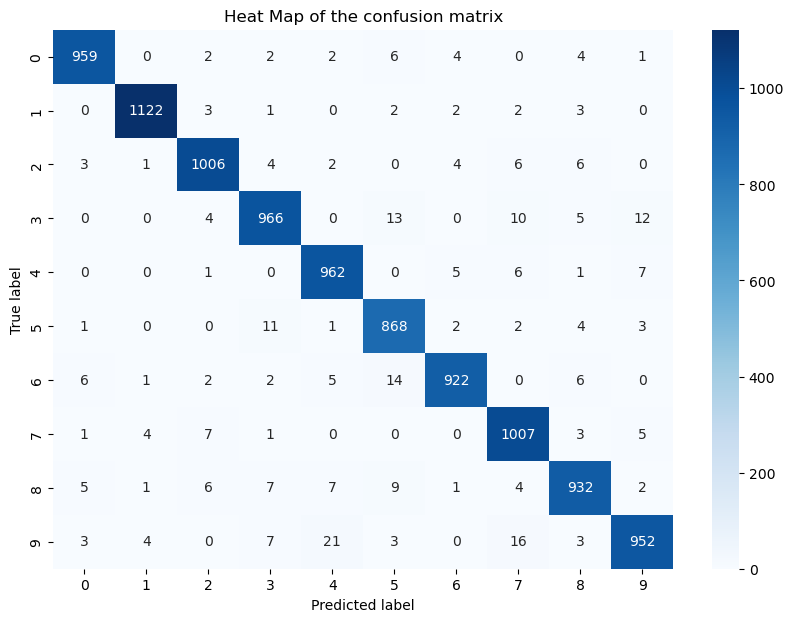

In [122]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Heat Map of the confusion matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.plot()

In [127]:
input_image = None
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
inputs = cv2.resize(grayscale, (28, 28))
inputs = inputs / 255
image_reshape = np.reshape(inputs, (1, 28, 28))

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [129]:
model.save('minst.h5')
model.save_weights('minst_weight.h5')